## Use case № 1
This notebook produces Effective Area (Aeff), Point Spread Function (PSF), Energy Dispersion (Edisp) files in .fits format from original KM3NeT simulation dst.root file

In [1]:
from km3irf import build_irf
from astropy.io import fits

In [24]:
from os import path
import numpy as np

Define a path to your local `dst.root` file:

In [3]:
folder = "/run/media/msmirnov/DATA2/data_files/IRF_data_create"

In [4]:
# data_path = "/run/media/msmirnov/iron_2tb/IRF_data_create/mcv5.1.km3_numuCC.ALL.dst.bdt.root"
# data_path = "/home/msmirnov/working_space/IRF_data_create/mcv5.1.km3_numuCC.ALL.dst.bdt.root"
# data_path = "/home/msmirnov/working_space/some_data/files_cta_km3net/mcv5.1.km3_numuCC.ALL.dst.bdt.root"
# data_path = "/run/media/msmirnov/DATA2/data_files/IRF_data_create/mcv5.1.km3_numuCC.ALL.dst.bdt.root"
data_path_nu = path.join(folder, "mcv5.1.km3_numuCC.ALL.dst.bdt.root")
data_path_anu = path.join(folder, "mcv5.1.km3_anumuCC.ALL.dst.bdt.root")

### Effective Area

Create BuildAeff object:

In [5]:
test_irf_nu = build_irf.DataContainer(data_path_nu)
test_irf_anu = build_irf.DataContainer(data_path_anu)

How many events in the file:

In [6]:
test_irf_nu.df.shape[0]

802872

In [7]:
test_irf_anu.df.shape[0]

844994

In [8]:
test_irf_nu.df.head(4)

,E,dir_x,dir_y,dir_z,E_mc,dir_x_mc,dir_y_mc,dir_z_mc,weight_w2,bdt0,bdt1
0,349.621209,-0.670299,0.270036,0.691216,268.990,-0.670996,0.286741,0.683772,4.510000e+11,12.0,-2.000000
1,20.423436,0.327411,0.078130,-0.941646,178.710,0.327387,0.079789,-0.941515,1.182000e+11,1.0,-2.000000
2,184.966630,0.794867,0.354793,-0.492248,214.610,0.799260,0.353143,-0.486285,1.960000e+11,1.0,-2.000000
3,52.327015,0.455668,-0.632999,0.625843,291.347,0.432161,-0.625802,0.649314,5.622000e+11,11.0,0.998906


Apply user defined cuts:

In [10]:
# for neutrinos
test_irf_nu.apply_cuts()
test_irf_nu.df.shape[0]

331325

In [11]:
# for antineutrinos
test_irf_anu.apply_cuts()
test_irf_anu.df.shape[0]

362186

Apply re-weighting procedure

In [12]:
weighted_dict = test_irf_nu.weight_calc(tag="nu")
weighted_dict.values()

dict_values([array([8.43265542e+00, 7.72364843e+00, 7.77098987e+00, ...,
       1.99530627e-05, 2.18194734e-05, 1.78086831e-05])])

In [16]:
# add anu weights
weighted_dict.update(test_irf_anu.weight_calc(tag="nubar"))

In [17]:
weighted_dict.keys()

dict_keys(['nu', 'nubar'])

In [27]:
weights_all = np.concatenate([weighted_dict['nu'], weighted_dict['nubar']])

In [19]:
# merge two flavors
test_irf_nu.merge_flavors(df_flavor=test_irf_anu.df)

Build .fits for effective area, it needs to specify the input pandas data frame.

In [20]:
test_irf_nu.build_aeff(output="aeff_new.fits")

file aeff_new.fits is written successfully!


Check the output file with `gammapy`

In [21]:
# install gammapy if it needs
#!pip install gammapy
from km3irf import utils

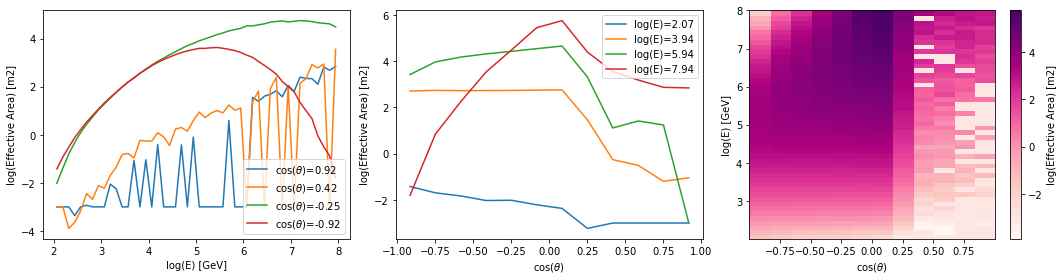

In [22]:
# Read effective area IRFs
aeff = utils.DrawAeff(aeff_path="./aeff_new.fits")
# draw
aeff.peek()

### Point Spread Function

In [ ]:
test_irf_nu.build_psf()

Check the output file `psf.fits` with `gammapy`:

In [ ]:
from gammapy.irf import PSF3D

In [ ]:
psf = PSF3D.read("psf.fits", hdu="PSF_2D_TABLE")
print(psf)

In [ ]:
psf.peek()

### Energy dispertion

In [ ]:
test_irf.build_edisp(norm=True, smooth=False, smooth_norm=False)

Check the output file `edisp.fits` with `gammapy`:

In [ ]:
from gammapy.irf import EnergyDispersion2D

In [ ]:
edisp = EnergyDispersion2D.read("edisp.fits", hdu="EDISP_2D")
print(edisp)

In [ ]:
edisp.peek()

Write all created fits files to the one combined IRF file.

In [ ]:
from km3irf.utils import merge_fits

background is takken from `km3irf` data folder

In [ ]:
merge_fits(
    aeff_fits="aeff.fits",
    psf_fits="psf.fits",
    edisp_fits="edisp.fits",
    output_path=".",
    output_file="combined_IRF.fits",
)